In [98]:
import numpy as np
import pandas as pd 
import scipy.stats as st ## For norm function
import pprint as pp

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Silence warnings 
import warnings
warnings.filterwarnings("ignore")

In [99]:
## Reading in the data
data = pd.read_csv("../turnout.csv")
data.head(10) ## Displaying the first 10 rows 

,id,age,educate,income,vote,white
0,1,60,14.0,3.3458,1,1
1,2,51,10.0,1.8561,0,1
2,3,24,12.0,0.6304,0,1
3,4,38,8.0,3.4183,1,1
4,5,25,12.0,2.7852,1,1
5,6,67,12.0,2.3866,1,1
6,7,40,12.0,4.2857,0,1
7,8,56,10.0,9.3205,1,1
8,9,32,12.0,3.8797,1,1
9,10,75,16.0,2.7031,1,1


In [92]:
## Splitting the data into training and test data sets
np.random.seed(111) ## Setting the seed so that the same dataset is generated in every execution

train_fraction = 0.8 ## The fraction of the data set for training 

train_data = data.sample(frac = train_fraction).reset_index(drop = True) ## training data set
test_data = data.drop(train_data.index).reset_index(drop = True) ## test data set

## Displaying the training and test data set 

print("The training data has ", train_data.shape[0], "observations.", 
      "\nThe test data has ", test_data.shape[0], "observations")

print("Displaying the head of the training data set : ")
train_data.head(10)

The training data has  1600 observations. 
The test data has  400 observations
Displaying the head of the training data set : 


,id,age,educate,income,vote,white
0,1861,54,10.0,1.2659,1,1
1,354,44,16.0,3.1676,1,0
2,1334,45,14.0,5.1780,1,0
3,906,80,8.0,1.2610,0,1
4,1290,26,14.0,7.0281,0,1
5,1274,28,12.0,6.3352,1,1
6,939,53,7.0,0.5405,1,0
7,1732,43,12.0,5.1780,0,1
8,66,44,16.0,9.3205,1,0
9,1324,61,8.0,2.9170,1,1


In the data set, we have one discrete predictor and three continuous predictors. For **discrete predictors**, we can calculate the conditional probabilities as follows.   

In [101]:
## Spiltting the data set according to the class 'vote'
y_1 = train_data.query("vote == 1")
y_0 = train_data.query("vote == 0")

## Calculating conditional probabilities for the discrete predictor 'white' and storing in dictionary

y0_white0 = y_0.query("white == 0").shape[0]/y_0.shape[0]
y0_white1 = y_0.query("white == 1").shape[0]/y_0.shape[0]
y1_white0 = y_1.query("white == 0").shape[0]/y_1.shape[0]
y1_white1 = y_1.query("white == 1").shape[0]/y_1.shape[0]


white_cond_prob = \
{('white', 0.0, 0) : y0_white0,
 ('white', 1.0, 0) : y0_white1,
 ('white', 0.0, 1) : y1_white0,
 ('white', 1.0, 1) : y1_white1 
}

## Calculating the class probabilities
pr_y_1 = y_1.shape[0]/train_data.shape[0]
pr_y_0 = y_0.shape[0]/train_data.shape[0]

pp.pprint(white_cond_prob)


{('white', 0.0, 0): 0.21105527638190955,
 ('white', 0.0, 1): 0.12562396006655574,
 ('white', 1.0, 0): 0.7889447236180904,
 ('white', 1.0, 1): 0.8743760399334443}


For the **continuous predictors**, we have to plot their conditional distributions to see their shape. If they are **normally distributed** then we can use their mean and standard error to obtain the probabilities of a particular value in the distribution.  

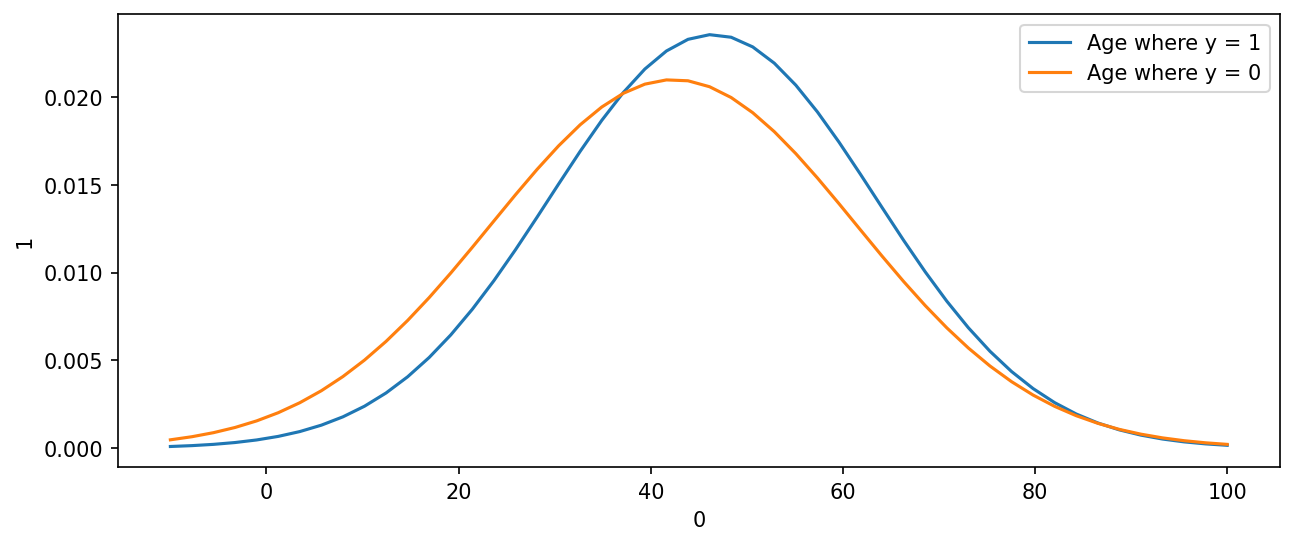

In [102]:
## For age variable, calculating the mean and standard error of the distribution given the class 
## The values are stored in a dictionary with the key in the form of tuples
dist_locs_1 = {("Age",1):{'mean':y_1.age.mean(),'sd':y_1.age.std()},
 ("Age",0):{'mean':y_0.age.mean(),'sd':y_0.age.std()}}

# Plot with seaborn
plt.figure(figsize=(10,4),dpi=150)

for key in dist_locs_1.keys():
    locs = dist_locs_1[key]
    d = pd.DataFrame([[i,st.norm(locs['mean'], locs['sd']).pdf(i)] 
                      for i in np.linspace(-10,100)])
    ax = sns.lineplot(d[0],d[1],label=f"{key[0]} where y = {key[1]}")

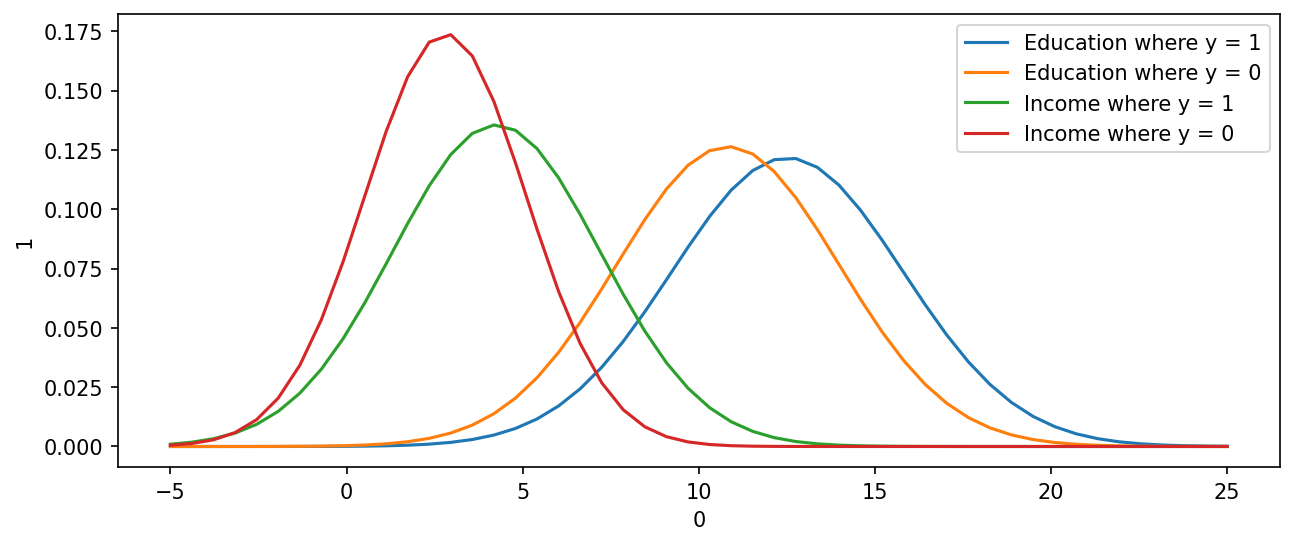

In [103]:
## For educate and income variables, calculating the mean and standard error of the distribution given the class
## The values are stored in a dictionary with the key in the form of tuples
dist_locs_2 = \
 {("Education", 1):{'mean':y_1.educate.mean(),'sd':y_1.educate.std()},
 ("Education", 0):{'mean':y_0.educate.mean(),'sd':y_0.educate.std()},
 ("Income", 1):{'mean':y_1.income.mean(),'sd':y_1.income.std()},
 ("Income", 0):{'mean':y_0.income.mean(),'sd':y_0.income.std()}}    
    

# Plot with seaborn
plt.figure(figsize=(10,4),dpi=150)

for key in dist_locs_2.keys():
    locs = dist_locs_2[key]
    d = pd.DataFrame([[i,st.norm(locs['mean'], locs['sd']).pdf(i)] 
                      for i in np.linspace(-5,25)])
    ax = sns.lineplot(d[0],d[1],label=f"{key[0]} where y = {key[1]}")    

As seen from the plots above, the **continuous predictors** are **normally distributed**, so we can use the means and standard deviations of the conditional distributions to calculate required probabilities.

In [104]:
## Dictionary containing the means and standard errors of the conditional distributions
## The values are stored in a dictionary with the key in the form of tuples
dist_locs = \
 {("educate", 1):{'mean':y_1.educate.mean(),'sd':y_1.educate.std()},
 ("educate", 0):{'mean':y_0.educate.mean(),'sd':y_0.educate.std()},
 ("income", 1):{'mean':y_1.income.mean(),'sd':y_1.income.std()},
 ("income", 0):{'mean':y_0.income.mean(),'sd':y_0.income.std()},
 ("age",1):{'mean':y_1.age.mean(),'sd':y_1.age.std()},
 ("age",0):{'mean':y_0.age.mean(),'sd':y_0.age.std()}} 




In [105]:
def bayesian_classifier(data, discrete_prob, dist_locs, prob_0, prob_1) :
    """
    Function to get the conditional probabilites of the observations in the data and calculate the predictions
    
    Arguments :
    ~~~~~~~~~~~~
    data : data set for which predictions are desired
    discrete_prob : dictionary containing the conditional probabilities for the discrete variable 
    dist_locs : dictionary containing the means and standard errors for the continuous variables 
    prob_0 : probability of class == 0 
    prob_1 : probability of class == 1
    
    Returns :
    ~~~~~~~~~~~
    pred_df : Data frame containing the conditional probabilities and the predictions 
    """
    predictions = [] ## Initializing list to contain the predictions
    ## Reordering the data frame to get the columns vote and white to the beginning 
    cols = data.columns.to_list() 
    cols = cols[-2:] + cols[:-2] 
    df = data[cols]
    
    ## Getting the conditional probabilities
    for i,row in df.iterrows() :
        
        pr_0 = 1 ## Conditional probability of class == 0 given data
        pr_1 = 1 ## Conditional probability of class == 1 given data
        
        ## Getting the conditional probabilities for the discrete predictor white (index is 1 in the data frame)
        pr_0 *= discrete_prob[(row.index[1], row.values[1], 0)] 
        pr_1 *= discrete_prob[(row.index[1], row.values[1], 1)]
        
        ## Getting the conditional probabilities for the continuous predictors using the dictionary 
        for j in range(3, len(row)) :
            pr_0 *= st.norm(dist_locs[(row.index[j], 0)]['mean'],
                            dist_locs[(row.index[j], 0)]['sd']).pdf(row.values[j])
            pr_1 *= st.norm(dist_locs[(row.index[j], 1)]['mean'],
                            dist_locs[(row.index[j], 1)]['sd']).pdf(row.values[j])
            
        pr_0 *= prob_0 ## Multipyling with the probability of respective class 
        pr_1 *= prob_1
        
        ## Generating predictions
        if pr_0 >= pr_1 :
            class_prediction = 0
        else :
            class_prediction = 1
            
        predictions.append([pr_0, pr_1, class_prediction]) ## Appending to list 
    
    ## Creating and returning predictions data frame 
    pred_df = pd.DataFrame(predictions, columns = ["Probability of 0", "Probability of 1", "Prediction"])
    return pred_df
            

In [106]:
## Getting predictions for training data 
pred_train = bayesian_classifier(train_data, white_cond_prob, dist_locs, pr_y_0, pr_y_1)

## Finding the accuracy of predictions 
accuracy_train = sum(train_data.vote == pred_train.Prediction)/train_data.shape[0]
accuracy_train

0.743125

In [107]:
## Getting predictions for test data 
pred_test = bayesian_classifier(test_data, white_cond_prob, dist_locs, pr_y_0, pr_y_1)

## Finding the accuracy of predictions 
accuracy_test = sum(test_data.vote == pred_test.Prediction)/test_data.shape[0]
accuracy_test

0.7125

**Conclusion** : After contructing a naive Bayesian estimator to determine whether a person would vote based on given data, it was found that the model predicted training data set with ~**74%** accuracy and the test data set with an accuracy of ~**71%**.   